**Breast Cancer Classification**<br/>
**Ramakrishnan A**<br/>

**Model - Support Vector Machines - https://en.wikipedia.org/wiki/Support-vector_machine**<br/>

**Data from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)**<br/>
**Data Folder: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/**<br/>
**Data Description: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names**

**From the Data description available above**
- Number of instances: 569 

- Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

- Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

- Missing attribute values: none
- Class distribution: 357 benign, 212 malignant

In [34]:
#All the imports needed except for data load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#Loading the dataset
from sklearn.datasets import load_breast_cancer
breastCancerData = load_breast_cancer()

# Print the raw data
# breastCancerData

# Print the keys
# breastCancerData.keys()

# Print a specific key
# print(breastCancerData['DESCR'])
# print(breastCancerData['feature_names'])
# print(breastCancerData['target_names'])

In [36]:
# Shape of the data without the target
breastCancerData['data'].shape
# The output means that there are 569 rows (data points) each of which have 30 columns (features)

(569, 30)

In [37]:
# np.c_ is actually a class object with a __getitem__ method, so it works with the [] syntax. 
dataFrame = pd.DataFrame(np.c_[breastCancerData['data'], breastCancerData['target']], columns = np.append(breastCancerData['feature_names'], ['target']))

In [38]:
# Some visualization

# Get the first 5 lines
# dataFrame.head()

# Get the last 10 lines
# dataFrame.tail(10)

**Visualization using Seaborn and Pyplot**

C:\Users\Ramki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


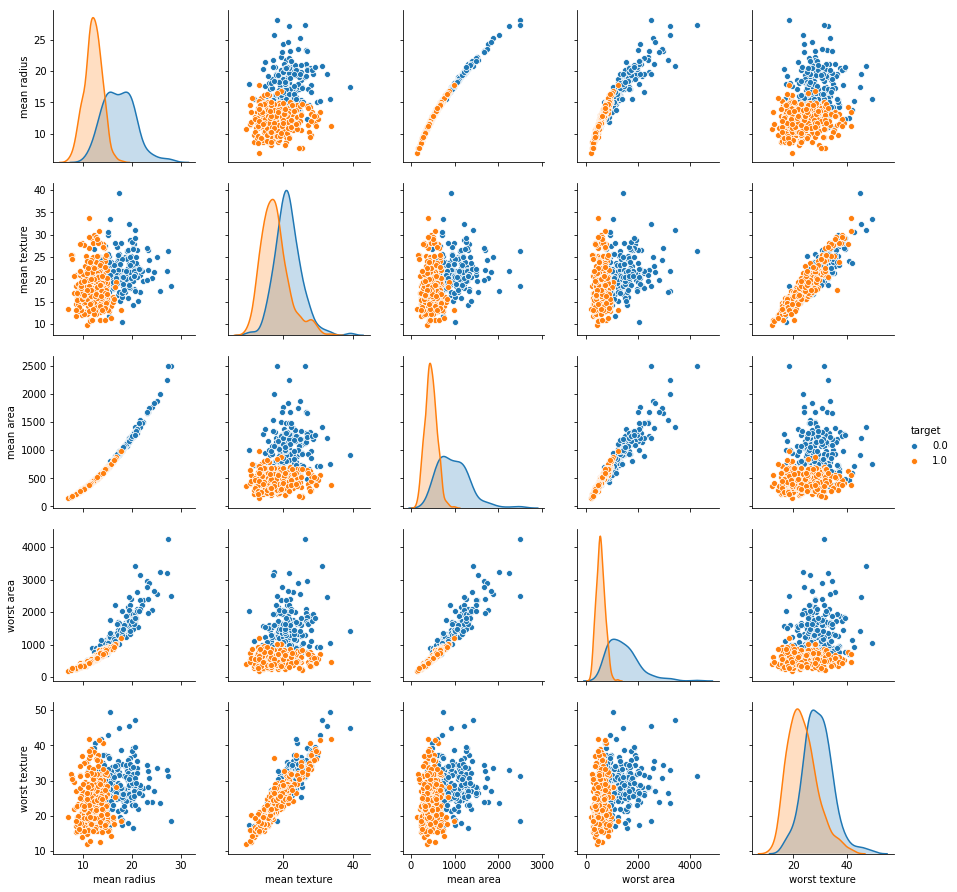

In [39]:
sns.pairplot(dataFrame, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'worst area', 'worst texture'])

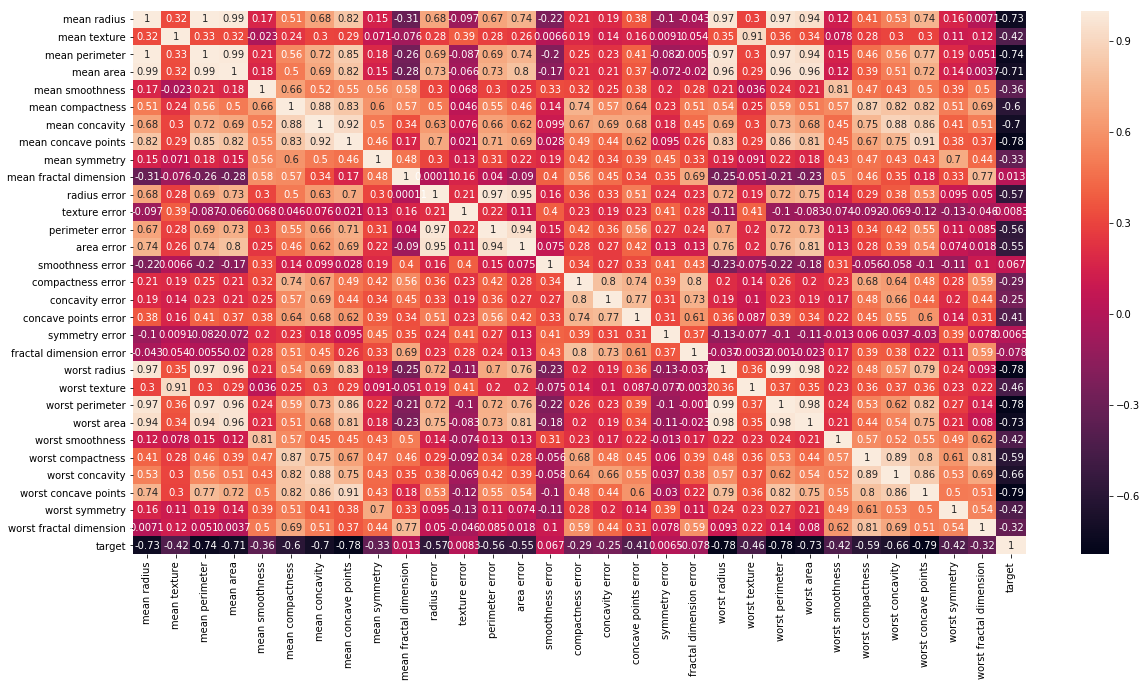

In [40]:
plt.figure(figsize=(20,10)) 
sns.heatmap(dataFrame.corr(), annot=True) 

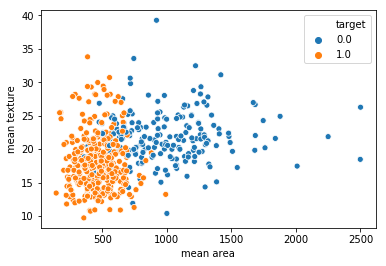

In [41]:
sns.scatterplot(x = 'mean area', y = 'mean texture', hue = 'target', data = dataFrame)

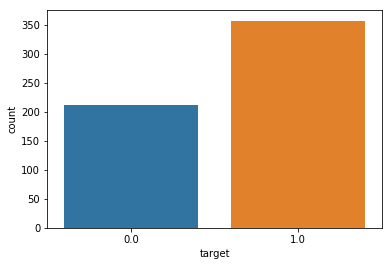

In [42]:
sns.countplot(dataFrame['target'], label = "Count")

**Model**

In [43]:
# Drop the last column (target) and put the data in X & y
X = dataFrame.drop(['target'],axis=1)
y = dataFrame['target']

In [46]:
from sklearn.model_selection import train_test_split

# Using defaults
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [49]:
from sklearn.svm import SVC 

svmModel = SVC()
svmModel.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
y_pred = svmModel.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_pred)

In [53]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        43
        1.0       0.62      1.00      0.77        71

avg / total       0.39      0.62      0.48       114



C:\Users\Ramki\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


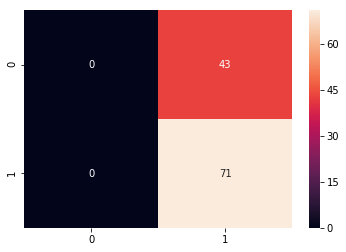

In [52]:
sns.heatmap(confusionMatrix, annot=True)

**Data Normalization**

**Simple Normalization**
(X - Xmin) / (Xmax - Xmin)


In [57]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

**Viewing the data again**

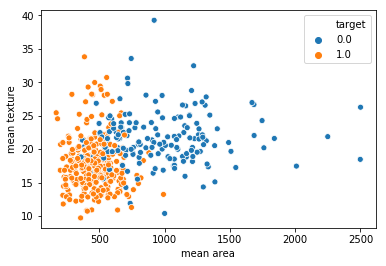

In [58]:
sns.scatterplot(x = X_train['mean area'], y = X_train['mean texture'], hue = y_train)

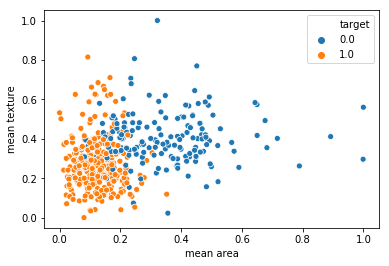

In [59]:
sns.scatterplot(x = X_train_scaled['mean area'], y = X_train_scaled['mean texture'], hue = y_train)

**C-Parameter in SVM**<br/>

C is essentially a regularisation parameter, which controls the trade-off between achieving a low error on the training data and minimising the norm of the weights.<br/>
**Small C - Penalty of misclassification is low**<br/>
**Large C - Penalty of misclassification is high, which means that the model has to explain the input data better**<br/>


**Gamma in SVM**<br/>

Gamma controls how far the influence of a single training set reaches. <br/>
**Small Gamma - Higher reach meaning that the solution is generalized**<br/>
**Large Gamma - Smaller reach meaning that the data points nearer to the place have higher weight**<br/>

**Building the Model using GridSearchCV and C & Gamma parameters**

In [101]:
gridParams = {'C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100], 'gamma': [10, 5, 1, 0.5, 0.1, 0.01, 0.001], 'kernel': ['poly', 'rbf']}

In [113]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),gridParams, verbose=1)

In [114]:
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:   12.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100], 'gamma': [10, 5, 1, 0.5, 0.1, 0.01, 0.001], 'kernel': ['poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [115]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [116]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
grid_predictions = grid.predict(X_test_scaled)

In [118]:
cm = confusion_matrix(y_test, grid_predictions)

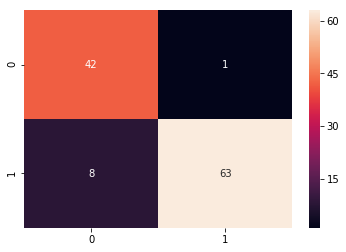

In [119]:
sns.heatmap(cm, annot=True)

In [120]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

        0.0       0.84      0.98      0.90        43
        1.0       0.98      0.89      0.93        71

avg / total       0.93      0.92      0.92       114



**93% Accuracy. However, we need to do better than this as there are 9 misclassified samples, of which 8 are saying that the the patient has malignant cancer, but the model misclassified it as benign.**<br/>
It can be further optimized by tuning the gamma and C parameters. Also, we can choose some more parameters to be passed onto the GridSearchCV like refit, cv etc. However, I am stopping here